<a href="https://colab.research.google.com/github/ubhole9/data-science/blob/main/mywork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [82]:
names=['ID','Clump Thickness','UniCellSize','UniCellShape','adhesion','S E C size','BareNuclei','bland','Nucleoli','Mitoses','Class']
df=pd.read_csv('breast-cancer-wisconsin.data.csv',header=None,names=names)

In [83]:
df.head()

,ID,Clump Thickness,UniCellSize,UniCellShape,adhesion,S E C size,BareNuclei,bland,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [84]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               699 non-null    int64 
 1   Clump Thickness  699 non-null    int64 
 2   UniCellSize      699 non-null    int64 
 3   UniCellShape     699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   S E C size       699 non-null    int64 
 6   BareNuclei       699 non-null    object
 7   bland            699 non-null    int64 
 8   Nucleoli         699 non-null    int64 
 9   Mitoses          699 non-null    int64 
 10  Class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [85]:
df.corr()

,ID,Clump Thickness,UniCellSize,UniCellShape,adhesion,S E C size,bland,Nucleoli,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
UniCellSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
UniCellShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
S E C size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [86]:
df.describe()

,ID,Clump Thickness,UniCellSize,UniCellShape,adhesion,S E C size,bland,Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


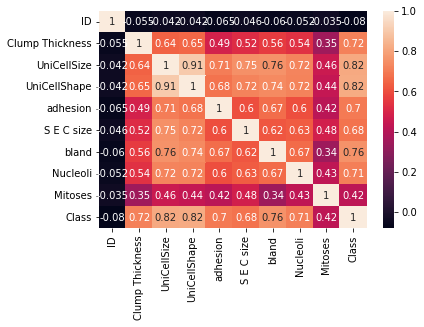

In [87]:
sns.heatmap(df.corr(),annot=True)

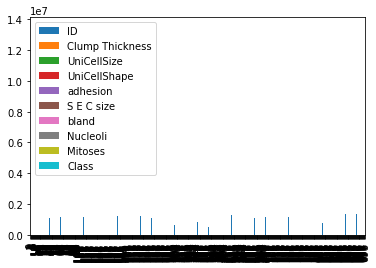

In [88]:
df.plot(kind="bar")

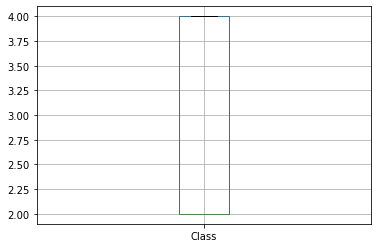

In [89]:
df.boxplot("Class")

In [90]:
df.isnull().sum()

ID                 0
Clump Thickness    0
UniCellSize        0
UniCellShape       0
adhesion           0
S E C size         0
BareNuclei         0
bland              0
Nucleoli           0
Mitoses            0
Class              0
dtype: int64

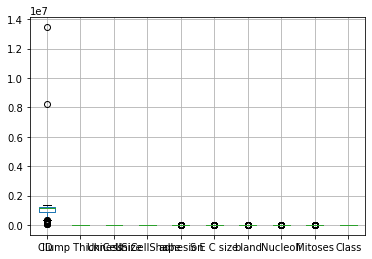

In [91]:
df.boxplot()

In [92]:
df.shape

(699, 11)

In [93]:
#checking for the count of patients which are infected or not
data=df.value_counts("Class")

In [95]:
new=df[df["BareNuclei"]=='?'].value_counts()

In [102]:
new.shape

(16,)

In [97]:
data1=df[df.BareNuclei=="?"]

In [98]:
data1=data1.Class.value_counts()

In [99]:
data1

2    14
4     2
Name: Class, dtype: int64

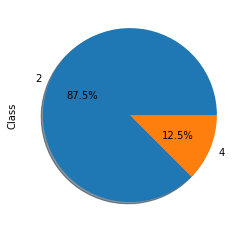

In [101]:
data1.plot(kind="pie",shadow=True,autopct='%1.1f%%')

In [116]:
modified=df['BareNuclei'].replace('?',np.NaN)

In [117]:
modified

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuclei, Length: 699, dtype: object

In [118]:
df.isnull().sum()

ID                 0
Clump Thickness    0
UniCellSize        0
UniCellShape       0
adhesion           0
S E C size         0
BareNuclei         0
bland              0
Nucleoli           0
Mitoses            0
Class              0
dtype: int64

In [121]:
df['BareNuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

In [120]:
df.replace("?",np.NaN,inplace=True)

In [122]:
df.isnull().sum()

ID                  0
Clump Thickness     0
UniCellSize         0
UniCellShape        0
adhesion            0
S E C size          0
BareNuclei         16
bland               0
Nucleoli            0
Mitoses             0
Class               0
dtype: int64

In [132]:
data2=df.dropna()

In [133]:
data2.isnull().sum()

ID                 0
Clump Thickness    0
UniCellSize        0
UniCellShape       0
adhesion           0
S E C size         0
BareNuclei         0
bland              0
Nucleoli           0
Mitoses            0
Class              0
dtype: int64

In [140]:
Y=df.iloc[:,-1]
X=df.drop(["ID","Class"],axis=1)

In [142]:
X.head()

,Clump Thickness,UniCellSize,UniCellShape,adhesion,S E C size,BareNuclei,bland,Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [143]:
from sklearn.preprocessing import LabelEncoder

In [145]:
LE=LabelEncoder()

In [146]:
Y=LE.fit_transform(Y)

In [147]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [150]:
#for spliting data
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=23)

In [156]:
#logistic regreesion
model=LogisticRegression()